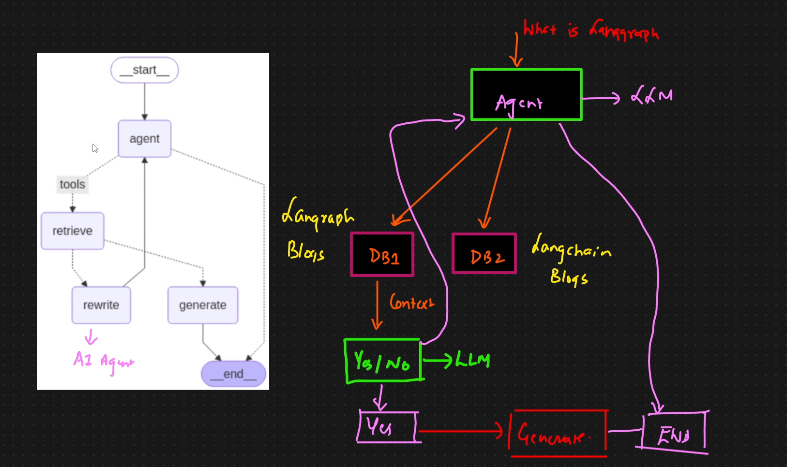

##### Agentic RAG

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')
os.environ['OPENAI_API_KEY']=os.getenv('OPENAI_API_KEY')

In [3]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


##### 1st Vector Store

In [4]:
urls=['https://langchain-ai.github.io/langgraph/tutorials/introduction/',
      'https://langchain-ai.github.io/langgraph/tutorials/workflows/',
      'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/',
      ]

In [5]:
docs=[WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nThese docs will be deprecated and removed with the release of LangGraph v1.0 in October 2025. Visit the v1.0 alpha docs\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          

In [8]:
doc_list=[item for sublist in docs for item in sublist]
print(doc_list)
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=100)
doc_splits=text_splitter.split_documents(doc_list)


vector_store=FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings(model='text-embedding-3-small')
)

retriever=vector_store.as_retriever()

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nThese docs will be deprecated and removed with the release of LangGraph v1.0 in October 2025. Visit the v1.0 alpha docs\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            In

In [9]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool=create_retriever_tool(
    retriever,
    "retriever_vector_db_blog",
    "Search and run information about Langgraph"
)

##### 2nd Vector Store

In [14]:
langchain_urls=[
    'https://python.langchain.com/docs/tutorials/',
    'https://python.langchain.com/docs/tutorials/chatbot/',
    'https://python.langchain.com/docs/tutorials/qa_chat_history/'
]

docs=[WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engine

In [15]:
doc_list=[item for sublist in docs for item in sublist]
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=100)
doc_splits=text_splitter.split_documents(doc_list)


vector_store_langchain=FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings(model='text-embedding-3-small')
)

retriever_langchain=vector_store_langchain.as_retriever()

In [16]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool_langchain=create_retriever_tool(
    retriever_langchain,
    "retriever_vector_langchain_blog",
    "Search and run information about Langchain"
)

In [48]:
tools=[retriever_tool,retriever_tool_langchain]

In [49]:
tools

[Tool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x7f6e7985f9c0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7f6e7a53d070>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x7f6e7985fb00>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7f6e7a53d070>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separa

##### LangGraph Workflow

In [50]:
from typing import Annotated,Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],add_messages]

In [51]:
from langchain_groq import ChatGroq
llm=ChatGroq(model='gemma2-9b-it')
llm.invoke('hi')

AIMessage(content='Hello! 👋\n\nHow can I help you today? 😄\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 0.001176469, 'queue_time': 0.248767119, 'total_time': 0.028449196}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--87ec4b1e-3b6a-4947-ac79-d3141869c3de-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})

In [52]:

def agent(state:AgentState):
    print("---CALL AGENT---")
    messages=state['messages']
    model=ChatGroq(model='gemma2-9b-it')
    model=model.bind_tools(tools)
    response=model.invoke(messages)

    return {'messages':[response]}

In [53]:
from typing import Annotated,Literal,Sequence

from langchain import hub
from langchain_core.messages import BaseMessage,HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

from pydantic import BaseModel,Field

In [54]:
def grade_documents(state:AgentState) -> Literal['generate','rewrite']:
    "determines whether the retrieved documents are relevant to the question."

    print("---CHECK RELEVANCE---")

    class grade(BaseModel):
        binary_score:str=Field(description="Relevance score 'yes' or 'no' ")

    model=ChatGroq(model='gemma2-9b-it')

    llm_with_tool=model.with_structured_output(grade)

    prompt=PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question.\n
        Here is the retrieved document:\n\n {context}\n\n
        Here is the user question:{question}\n
        If the document contains keyword(s) or semantic meaning related to the user question,grade it as relevant.\n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=['context','question']    
        )
    
    chain = prompt|llm_with_tool
    
    messages=state['messages']
    last_messages=messages[-1]

    question=messages[0].content
    docs=last_messages.content

    scored_result=chain.invoke({'question':question,'context':docs})

    score=scored_result.binary_score

    if score=='yes':
        print("--DECISION: DOCS RELEVANT--")
        return 'generate'
    else:
        print("--DECISION:DOCS NOT RELEVANT")
        print(score)
        return 'rewrite'

In [55]:
def generate(state):
    print("--GENERATE--")
    messages=state['messages']
    question=messages[0].content
    last_message=messages[-1]

    docs=last_message.content

    prompt=hub.pull('rlm/rag-prompt')

    llm=ChatGroq(model='gemma2-9b-it')

    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)
    
    rag_chain=prompt | llm | StrOutputParser()

    response=rag_chain.invoke({'context':docs,'question':question})
    return {'messages':[response]}

In [61]:
def rewrite(state:AgentState):
    print("---TRANSFORM QUERY---")

    messages=state['messages']
    question=messages[0].content

    msg=[
        HumanMessage(
            content=f"""
Look at the input and try to reason about the underlying semantic intent/meaning.\n
Here is the initial question:
\n------\n
{question}
\n------\n
Formulate an improved question:"""
        )
    ]

    model=ChatGroq(model='gemma2-9b-it')

    response=model.invoke(msg)
    return {'messages':[response]}

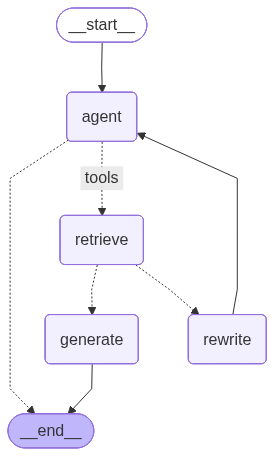

In [62]:
from langgraph.graph import START,StateGraph,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

workflow=StateGraph(AgentState)

workflow.add_node('agent',agent)
retrieve=ToolNode([retriever_tool,retriever_tool_langchain])
workflow.add_node("retrieve",retrieve)
workflow.add_node('rewrite',rewrite)

workflow.add_node(
    'generate',generate
)
workflow.add_edge(START,'agent')
workflow.add_conditional_edges(
    'agent',
    tools_condition,
    {
        'tools':'retrieve',
        END:END
    }
)

workflow.add_conditional_edges(
    'retrieve',
    grade_documents
)

workflow.add_edge('generate',END)
workflow.add_edge('rewrite','agent')

graph=workflow.compile()
from IPython.display import Image,display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [65]:
graph.invoke({'messages':'what is Langgraph?'})

---CALL AGENT---
---CHECK RELEVANCE---
--DECISION: DOCS RELEVANT--
--GENERATE--


{'messages': [HumanMessage(content='what is Langgraph?', additional_kwargs={}, response_metadata={}, id='b13523b6-51ae-4db9-87c3-77b937026b07'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '6tx3sw682', 'function': {'arguments': '{"query":"What is Langgraph?"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 1085, 'total_tokens': 1173, 'completion_time': 0.16, 'prompt_time': 0.020881101, 'queue_time': 0.258332108, 'total_time': 0.180881101}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--32807410-d6de-4591-9a04-29f6b9af34ff-0', tool_calls=[{'name': 'retriever_vector_db_blog', 'args': {'query': 'What is Langgraph?'}, 'id': '6tx3sw682', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1085, 'output_tokens': 88, 'total_tokens': 1173}),
  ToolMessage(content='LangSmit

In [64]:
graph.invoke({'messages':'what is Reinforcement Learning?'})

---CALL AGENT---
---CHECK RELEVANCE---
--DECISION:DOCS NOT RELEVANT
no
---TRANSFORM QUERY---
---CALL AGENT---


{'messages': [HumanMessage(content='what is Reinforcement Learning?', additional_kwargs={}, response_metadata={}, id='e9dbde5b-cac0-409b-b545-d7845640b743'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '3e9xfp0bt', 'function': {'arguments': '{"query":"What is Reinforcement Learning?"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 90, 'prompt_tokens': 1085, 'total_tokens': 1175, 'completion_time': 0.163636364, 'prompt_time': 0.020870962, 'queue_time': 0.255033237, 'total_time': 0.184507326}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--373d822e-6515-4b4b-81f3-6ba65bf3b0b5-0', tool_calls=[{'name': 'retriever_vector_langchain_blog', 'args': {'query': 'What is Reinforcement Learning?'}, 'id': '3e9xfp0bt', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1085, 'output_tokens':